<a href="https://colab.research.google.com/github/Hassan7838/linear-regression-model/blob/main/linear-regression-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Linear Regression for Continuous Target Variable

# Uploading file
from google.colab import files
upload = files.upload()

Saving HousingData.csv to HousingData (1).csv


In [ ]:
# Loading file
import pandas as pd
df = pd.read_csv('HousingData.csv')

In [ ]:
# Viewing DataSet
print("----First Five Rows----")
print(df.head())
print("----Shape----")
print(df.shape)
print("----Information----")
print(df.info())
print("----Missing Values----")
print(df.isnull().sum())

----First Five Rows----
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
----Shape----
(506, 14)
----Information----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   C

In [ ]:
# Using median to fill missing values
df.fillna(df.median(),inplace=True)

# Checking...
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Separating features (x) and target (y)
X = df.drop('MEDV',axis=1)
y = df['MEDV']

# Split into train and test set (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Show shapes to confirm
print("Training features shape",X_train.shape)
print("Testing features shape",X_test.shape)
print("Training labels shape",y_train.shape)
print("Testing labels shape",y_test.shape)

Training features shape (404, 13)
Testing features shape (102, 13)
Training labels shape (404,)
Testing labels shape (102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error : ",mae)
print("Root Mean Squared Error : ",rmse)
print("r^2 Score : ",r2)

Mean Absolute Error :  3.8547402081913384
Root Mean Squared Error :  5.011168467063227
r^2 Score :  0.7459023298998273


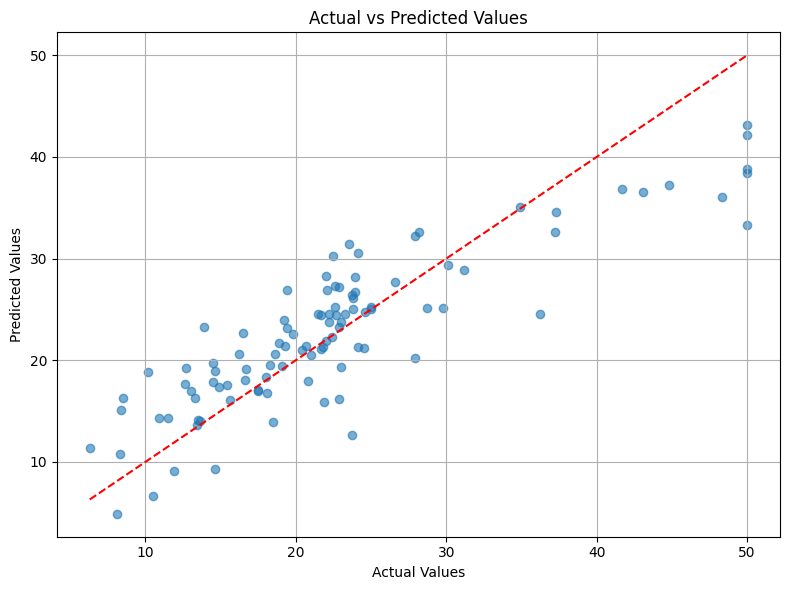

In [ ]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True) # better visualization
plt.tight_layout()
plt.show()